In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [103]:
titanic_df = pd.read_csv('/Users/jonathanjramirez/Downloads/train (1).csv')


#Check the first rows of the dataset to get an idea what information each variable contains
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# For types of each variable in the entire dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

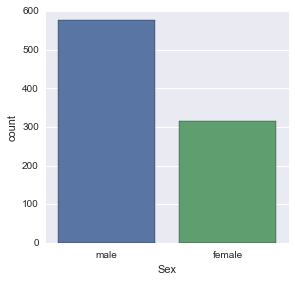

In [5]:
sns.factorplot('Sex', data = titanic_df, kind = 'count')

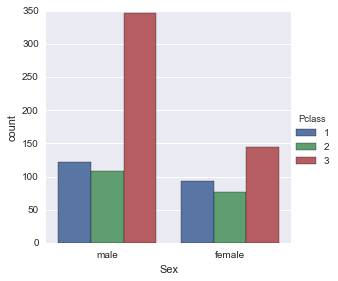

In [6]:
sns.factorplot('Sex', data = titanic_df, hue = 'Pclass', kind = 'count')

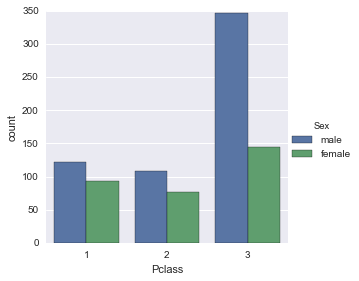

In [7]:
sns.factorplot('Pclass', data = titanic_df, hue = 'Sex', kind = 'count')

In [9]:
#Creating a function to identify children

def male_female_child(passenger):
    #Takes the age and sex attributes of passenger
    age,sex = passenger
    
    if (age <16):
        return 'child'
    else:
        return sex    

In [104]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

In [105]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


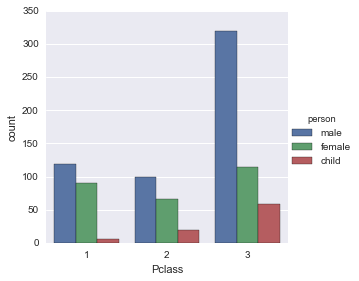

In [13]:
sns.factorplot('Pclass', data = titanic_df, hue = 'person', kind = 'count')

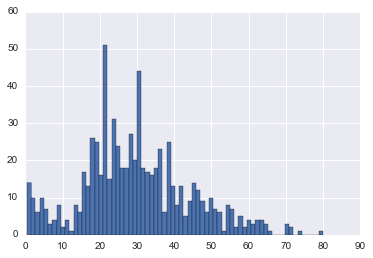

In [14]:
titanic_df['Age'].hist(bins = 70)

In [16]:
titanic_df['Age'].mean()

29.69911764705882

In [17]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

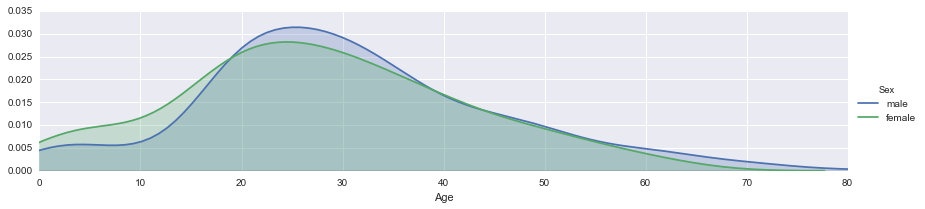

In [19]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

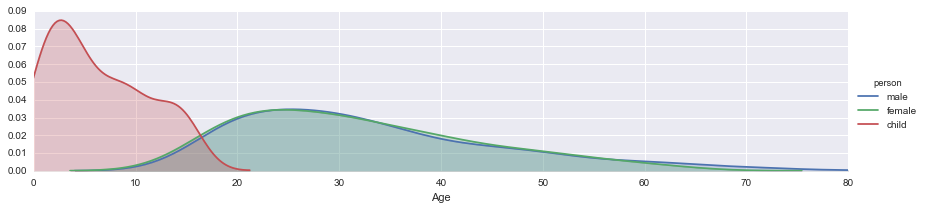

In [20]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

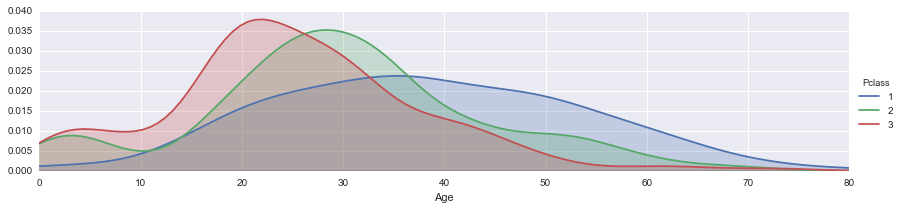

In [21]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
#To start to determine the level (A,B,C, etc), first isolate the cabin

deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [26]:
levels = []

for level in deck:
    levels.append(level[0])

levels[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

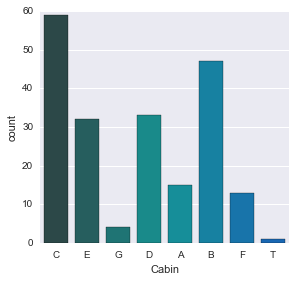

In [28]:
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

In [109]:
def socio_economic(passenger):
    gender, pclass = passenger
    
    if (gender == 'male') and (pclass == 1):
        return "Rich Male"
    elif (gender == 'female') and (pclass == 1):
        return "Rich Female"
    else:
        return "Child or lower class"
    
    

In [110]:
titanic_df['Socio-econ'] = titanic_df[['Sex', 'Pclass']].apply(socio_economic, axis = 1)

In [111]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Socio-econ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Child or lower class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Rich Female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Child or lower class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Rich Female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Child or lower class


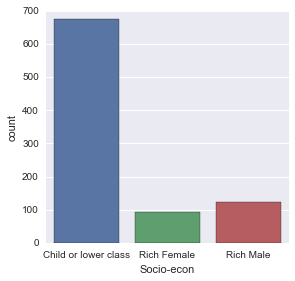

In [112]:
sns.factorplot('Socio-econ', data = titanic_df, kind = 'count')

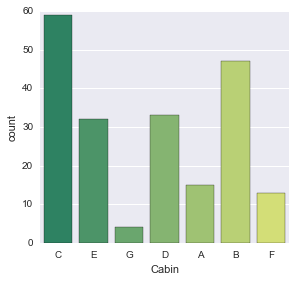

In [114]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin', data = cabin_df, palette = 'summer', kind = 'count')

In [115]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Socio-econ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Child or lower class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Rich Female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Child or lower class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Rich Female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Child or lower class


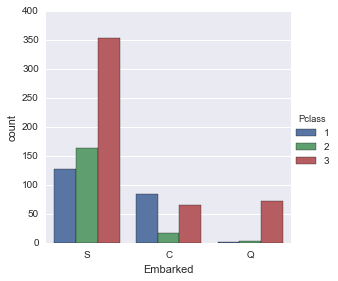

In [116]:
sns.factorplot("Embarked", data = titanic_df, hue = 'Pclass', kind = 'count')

In [117]:
#Who was alone and who was with family?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Socio-econ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Child or lower class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Rich Female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Child or lower class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Rich Female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Child or lower class


In [118]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch

In [120]:
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [122]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0 ] = 'Alone'

titanic_df['Alone']

/Users/jonathanjramirez/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

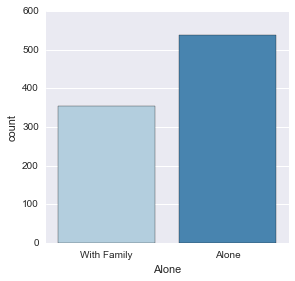

In [124]:
sns.factorplot('Alone', data = titanic_df, palette = 'Blues', kind = 'count')

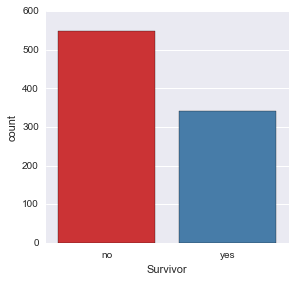

In [126]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

sns.factorplot('Survivor', data = titanic_df, palette = 'Set1', kind = 'count')

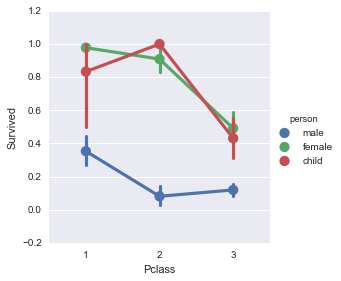

In [128]:
sns.factorplot('Pclass', 'Survived', hue = 'person', data = titanic_df)

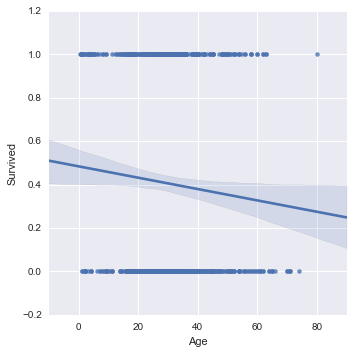

In [130]:
sns.lmplot('Age', 'Survived', data = titanic_df)

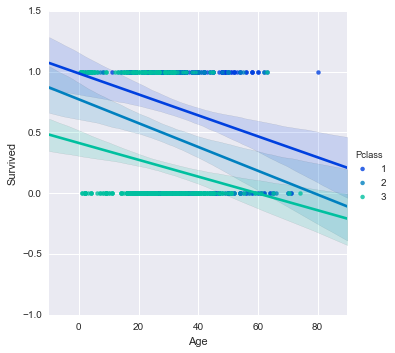

In [131]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass', palette = 'winter')

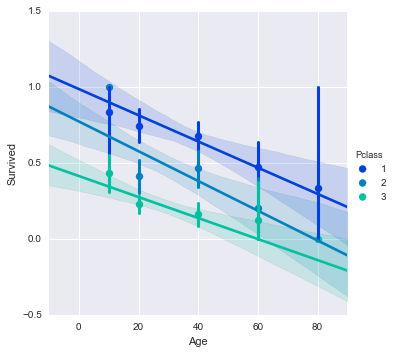

In [132]:
generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Pclass', palette = 'winter', x_bins = generations)

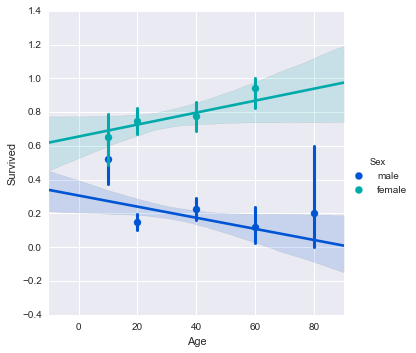

In [133]:
sns.lmplot('Age', 'Survived', data = titanic_df, hue = 'Sex', palette = 'winter', x_bins = generations)

In [ ]:
#Does deck level affect survival


In [141]:
def cabin_level(cabin):
    deck = cabin
    for level in deck:
        levels = level[0]
        return levels
    
#There are many NaN values, so make sure when you apply this function, skip over all NaNs    

titanic_df = titanic_df[titanic_df.Cabin != 'T']

titanic_df['cabin_level'] = titanic_df[['Cabin']].dropna().apply(cabin_level,axis=1)

titanic_df[['cabin_level']].describe()

/Users/jonathanjramirez/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cabin_level
count,203
unique,7
top,C
freq,59


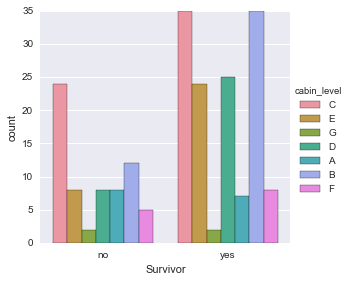

In [145]:
sns.factorplot('Survivor', data = titanic_df, hue = 'cabin_level', kind = 'count')

In [ ]:
#Survivors tended to be in levels A - B; i.e. the 1st 3 levels

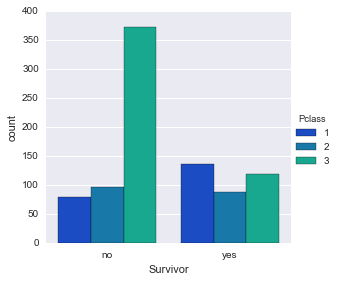

In [146]:
sns.factorplot('Survivor', data = titanic_df, hue = 'Pclass', kind = 'count', palette = 'winter')

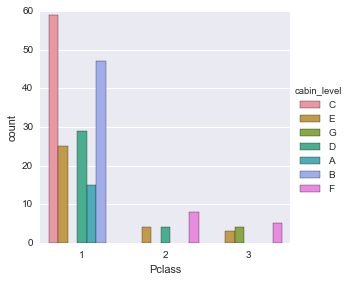

In [149]:
sns.factorplot('Pclass', data = titanic_df, hue = 'cabin_level', kind = 'count')

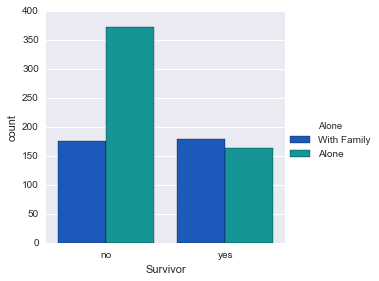

In [150]:
#Does having a family member affect survival?

sns.factorplot('Survivor', data = titanic_df, hue = 'Alone', kind = 'count', palette = 'winter')

In [ ]:
#it looks like having family made it more likely to survive, but what if we look at gender?

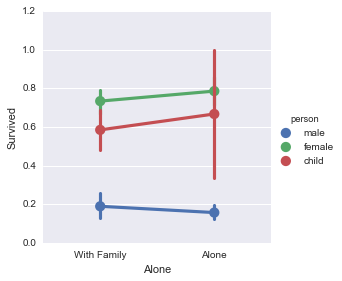

In [151]:
sns.factorplot('Alone', 'Survived', hue = 'person', data = titanic_df)